In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re 
from textblob import TextBlob
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from numpy import asarray
from numpy import zeros
from keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM
from keras.layers import Activation, Dropout, Dense
from keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

In [3]:
import numpy
from numpy import arange
data_raw = pd.read_csv("Film_revievs.csv")
data_raw['id'] = numpy.arange(0, len(data_raw))

In [11]:
data_raw.head(5)

,review,sentiment,id
0,one of the other reviewers has mentioned that ...,1,0
1,a wonderful little production the filming tech...,1,1
2,i thought this was a wonderful way to spend ti...,1,2
3,basically theres a family where a little boy j...,0,3
4,petter matteis love in the time of money is a ...,1,4


In [14]:
data_raw['sentiment'] = data_raw['sentiment'].replace('positive', 1)
data_raw['sentiment'] = data_raw['sentiment'].replace('negative', 0).infer_objects(copy=False)

### sentiment:
- 1 - positive
- 2 - negative

In [13]:
data_raw.head(5)

,review,sentiment,id
0,one of the other reviewers has mentioned that ...,1,0
1,a wonderful little production the filming tech...,1,1
2,i thought this was a wonderful way to spend ti...,1,2
3,basically theres a family where a little boy j...,0,3
4,petter matteis love in the time of money is a ...,1,4


### data distribution

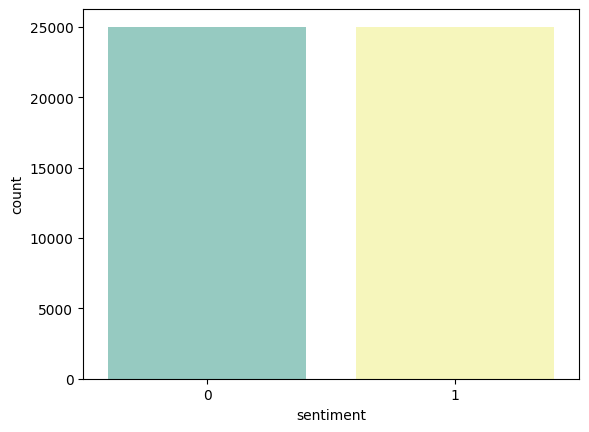

In [19]:
sns.countplot(data_raw, x = 'sentiment', hue='sentiment', palette = "Set3", dodge=False, legend=False)
plt.show()

In [20]:
print(data_raw['review'][1])
print(data_raw['review'][2100])

a wonderful little production the filming technique is very unassuming very oldtimebbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great masters of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwells murals decorating every surface are terribly well done
welli am a dancer so automatically i liked this film the only t

### data cleaning

In [25]:
nltk.download('stopwords')

data_raw['review'] = data_raw['review'].apply(lambda x: x.lower())
#html tags 
#*? - not greedy (as little text as possible)
data_raw['review'] = data_raw['review'].apply(lambda x: re.sub("<.*?>", "", x)) 
#punctuation marks 
data_raw['review'] = data_raw['review'].apply(lambda x: re.sub(r"[^\w\s]", "", x)) 
#deleting stopwords
stop_words = set(stopwords.words('english'))
stopwords_spaces = re.compile(r'\b(' + r'|'.join(stop_words) + r')\b\s*') #remove any spaces with stopwords
data_raw['review'] = data_raw['review'].apply(lambda x: stopwords_spaces.sub('', x)) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
X = data_raw['review']
Y = data_raw['sentiment']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42);
word_tokenizer = Tokenizer();
word_tokenizer.fit_on_texts(X_train);

X_train = word_tokenizer.texts_to_sequences(X_train);
X_test = word_tokenizer.texts_to_sequences(X_test);

In [30]:
vocab_length = len(word_tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen) #same length of every input
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen) #same length of every input

 ### GloVe word embedding (Global Vectors for Word Representation)

In [46]:
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('a2_glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

In [32]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

c:\Users\User\Downloads\nlp_workshop\nlp_workshop\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.6830 - loss: 0.5950 - val_accuracy: 0.8087 - val_loss: 0.4176
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.8474 - loss: 0.3554 - val_accuracy: 0.8409 - val_loss: 0.3602
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8801 - loss: 0.2974 - val_accuracy: 0.8414 - val_loss: 0.3536
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9065 - loss: 0.2488 - val_accuracy: 0.8479 - val_loss: 0.3420
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9300 - loss: 0.2073 - val_accuracy: 0.8484 - val_loss: 0.3408
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8531 - loss: 0.3365
fold 1, test accuracy: 0.8519999980926514
Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.7257 - loss: 0.5374 - val_accuracy: 0.8174 - val_loss: 0.3923
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8521 - loss: 0.3474 - val_accuracy: 0.8506 - val_

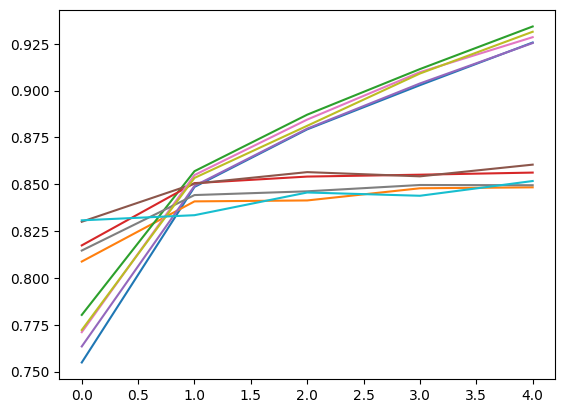

Mean accuracy of 6 folds: 0.8508000016212464


In [ ]:
from sklearn.model_selection import KFold
import numpy as np 
from keras.optimizers import Adam

kfold = KFold(n_splits=5, shuffle=True, random_state=42) #5 folds cross valifation
fold_no = 1
accuracies = [] #individal accuracies of a folds

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    X_train = word_tokenizer.texts_to_sequences(X_train)
    X_test = word_tokenizer.texts_to_sequences(X_test)

    X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
    X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

    cnn_model = Sequential()
    cnn_model.add(Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False))
    cnn_model.add(Conv1D(128, 5, activation='relu'))
    cnn_model.add(GlobalMaxPooling1D())
    cnn_model.add(Dense(1, activation='sigmoid'))
    cnn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    cnn_model_history = cnn_model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)
    
    plt.plot(cnn_model_history.history['accuracy'])
    plt.plot(cnn_model_history.history['val_accuracy'])
    
    score = cnn_model.evaluate(X_test, y_test, verbose=1)
    print(f"fold {fold_no}, test accuracy: {score[1]}")
    accuracies.append(score[1])
    fold_no += 1

plt.show()

print(f'Mean accuracy of {fold_no} folds: {np.mean(accuracies)}')


### GPT2Tokenizer


In [ ]:
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification
import torch
from tqdm.notebook import tqdm

#model and tokenizer
tokenizer = GPT2Tokenizer.from_pretrained("hipnologo/gpt2-imdb-finetune")
model = GPT2ForSequenceClassification.from_pretrained("hipnologo/gpt2-imdb-finetune")

test = data_raw.head(500)

model.eval() #model evaluation mode

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

correct_predictions = 0
total_predictions = 0

for i, row in tqdm(test.iterrows(), total=len(test)):
    text = row["review"]
    true_label = row["sentiment"]

    input_ids = tokenizer.encode(text, return_tensors="pt")

    input_ids = input_ids.to(device)

    with torch.no_grad():  
        logits = model(input_ids).logits

    predicted_class = logits.argmax(-1).item()

    if predicted_class == true_label:
        correct_predictions += 1
    total_predictions += 1

accuracy = correct_predictions / total_predictions
print(f"Validation Accuracy: {accuracy * 100:.2f}%")


### text visualization

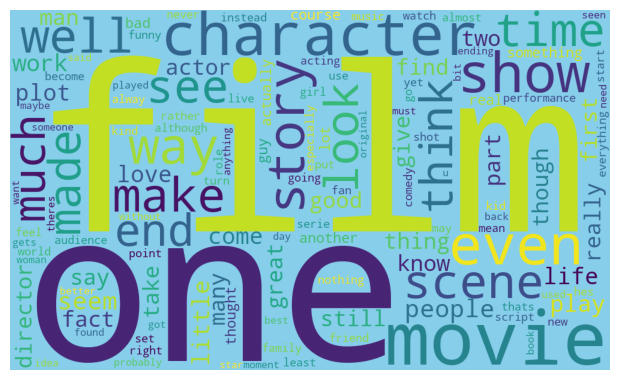

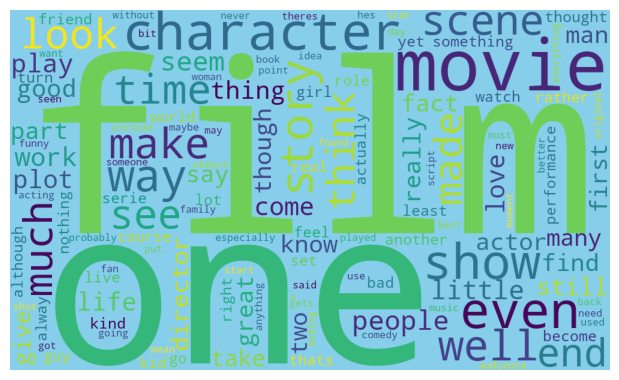

In [ ]:
from wordcloud import WordCloud

positive = data_raw[data_raw['sentiment'] == 'positive']
negative = data_raw[data_raw['sentiment'] == 'negative']

def visualize_wordcloud(data: pd.DataFrame, all_words: list, bgcolor: str) -> plt:
    wordcloud = WordCloud(
        width=1000, height=600, background_color="skyblue", min_font_size=15
    ).generate(all_words)
    plt.figure(figsize=(6, 4), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)

    return plt

def vizualize_words_in_classes(data_raw: pd.DataFrame) -> (plt, plt):
    data_raw["review"] = data_raw["review"].astype(str)
    all_words = " ".join(word for word in data_raw["review"])
    plot_negative = visualize_wordcloud(negative["review"], all_words, "black")
    plot_positive = visualize_wordcloud(positive["review"], all_words, "black")

    return plot_negative, plot_positive

plot_negative, plot_positive = vizualize_words_in_classes(data_raw)